In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.externals.six import StringIO
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors, datasets
import seaborn as sbn
from IPython.display import Image
# from mixtend.plotting import plot_confusion_matrix



ModuleNotFoundError: No module named 'sklearn.externals.six'

In [40]:
dados = {'x' : [25, 34, 22, 27, 33, 33, 31, 22, 35, 34, 67, 54, 57, 43, 50, 57, 59, 52, 65, 47, 49, 48, 35, 33, 44, 45, 38, 43, 51, 46],
         'y' : [79, 51, 53, 78, 59, 74, 73, 57, 69, 75, 51, 32, 40, 47, 53, 36, 35, 58, 59, 50, 25, 20, 14, 12, 20, 5, 29, 27, 8, 7]}

In [41]:
df = pd.DataFrame(dados, columns=['x', 'y'])
df.head()

,x,y
0,25,79
1,34,51
2,22,53
3,27,78
4,33,59


In [42]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(df)
centroides = kmeans.cluster_centers_
centroides

array([[38.75      , 61.625     ],
       [47.07142857, 22.14285714]])

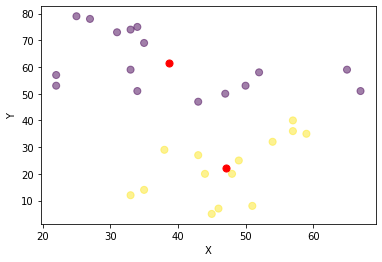

In [43]:
plt.scatter(df['x'], df['y'], c=kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', s=50)
plt.xlabel('X')
plt.ylabel('Y');

In [44]:
iris = datasets.load_iris()
df_iris = pd.DataFrame(data = np.c_[iris['data'], iris['target']], columns = iris['feature_names'] + ['target'])
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [45]:
x = df_iris.iloc[:, :-1].values
y = df_iris.iloc[:, 4].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [46]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [47]:
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [48]:
y_pred = classifier.predict(x_test)
y_pred

array([0., 2., 2., 2., 1., 1., 0., 1., 0., 0., 2., 0., 1., 2., 1., 1., 0.,
       2., 2., 1., 1., 1., 1., 0., 2., 2., 2., 2., 1., 2.])

In [49]:
confusion_matrix(y_test, y_pred)

array([[ 7,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

In [50]:
matrix_confusao = classification_report(y_test, y_pred) 
print(matrix_confusao)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         7
         1.0       1.00      1.00      1.00        11
         2.0       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [51]:
# fig, ax = plot_confusion_matrix(conf_mat = matrix_confusao)
# plot.show()

In [53]:
clf = DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [54]:
# matrix_confusao = confusion_matrix(y_test, y_pred)
# fig, ax = plot_confusion_matrix(conf_mat = matrix_confusao)

In [57]:
dot_data = StringIO()
export_graphviz(clf, out_file = dot_data, filled = True, rounded = True, special_characters = True, feature_names = iris.feature_names, class_names = ['0', '1', '2'])


NameError: name 'StringIO' is not defined